# Exercícios Aula 4 - Thiago Garbin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Exercício 1 – Cartão de Crédito

### Pré-processamento dos dados

In [3]:
# 1. Importe os dados;

# DEIXANDO A COLUNA CUST_ID COMO ÍNDICE
df_cc = pd.read_csv('CC_DATASET.csv', index_col='CUST_ID')

df_cc.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


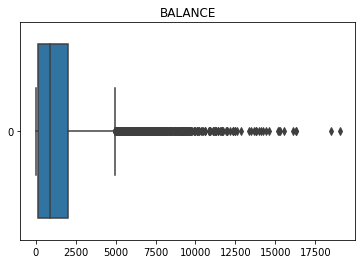

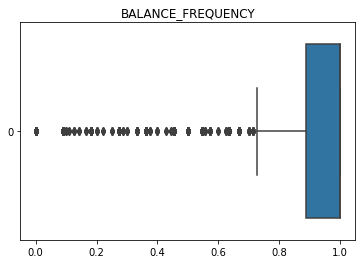

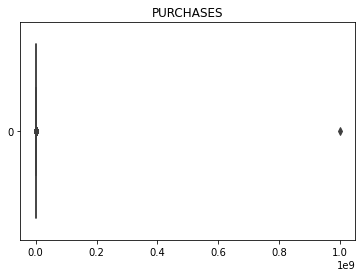

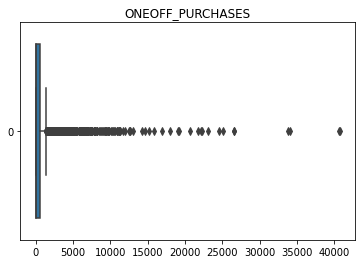

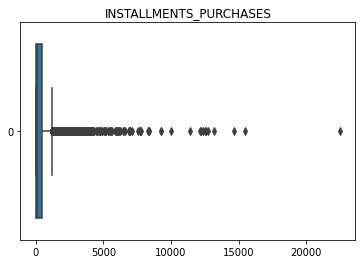

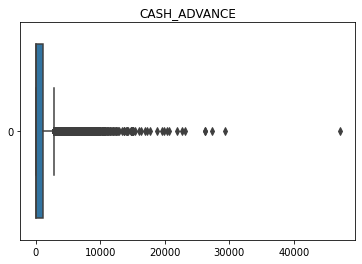

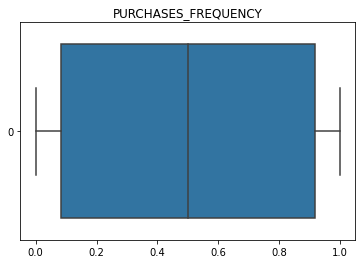

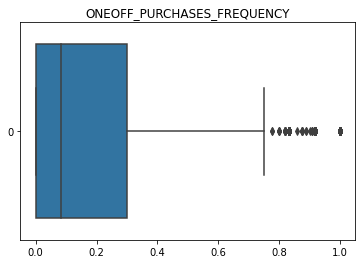

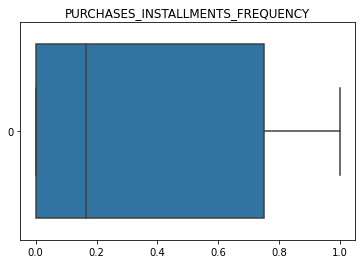

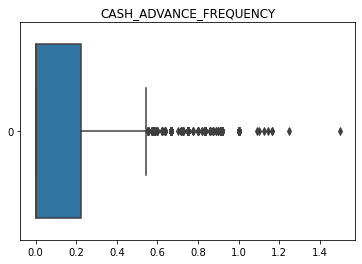

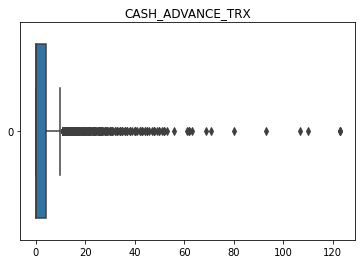

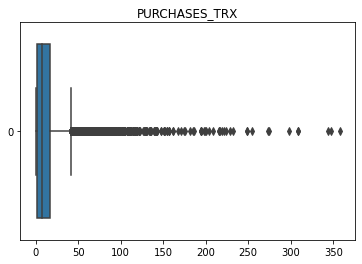

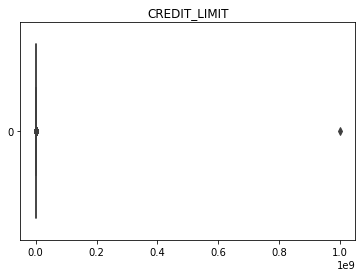

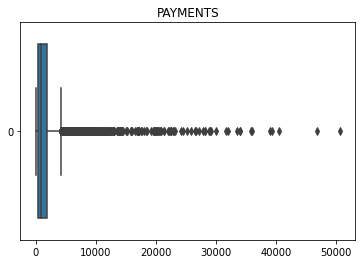

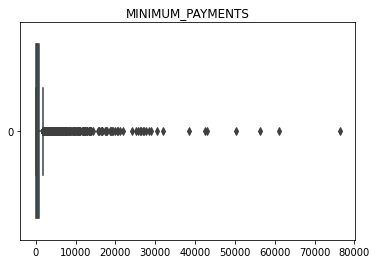

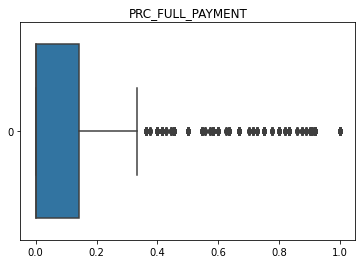

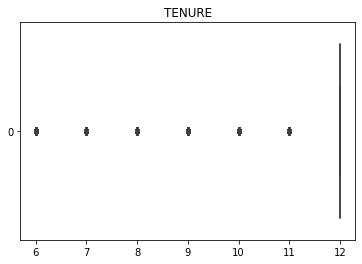

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.949000e+03,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1.127347e+05,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,1.162369e+05,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,1.057032e+07,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,1.057087e+07,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+01,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,3.963500e+01,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1.600000e+03,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,3.612800e+02,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3.000000e+03,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1.110130e+03,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6.500000e+03,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,1.000000e+09,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,1.000000e+09,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# 2. Tratamento dos outliers:
# a. Aqui você é quem vai escolher o método de tratamento (excluir registros? sobrescrever
#    com zeros? sobrescrever com a média ou mediana?). Analise os dados, e sob o seu
#    julgamento, escolha a melhor forma de tratar os outliers.
# b. Ao final, explique porque você tratou usando o método x, y, z...

# Considerando que o dataset conta com um grande número de registros, para a identificação
# e tratamento dos outliers serão inicialmente plotados gráficos de caixa sobre as variáveis
# (exceto CUSTID). Os gráficos de caixa permitem observar a distribuição dos dados ao indicar
# cinco pontos principais: o primeiro quartil (Q1, que representa 25% dos dados), o segundo quartil
# (Q2, que representa a mediana), o terceiro quartil (Q3, que representa 75% dos dados),
# o limite inferior (Q1 - 1,5*FIQ) e o limite superior (Q3 + 1,5*FIQ). Neste contexto,
# FIQ se refere à faixa interquartil, que é igual a distância entre Q1 e Q3.
# Em uma distribuição normal e pela regra FIQ, valores abaixo do limite inferior e valores acima
# do limite superior poderiam ser considerados outliers.

for column in df_cc.columns:
    sns.boxplot(data=df_cc[column], orient='h')
    plt.title(column)
    plt.show()

df_cc.describe()

In [5]:
# Fatia de dados que seria considerada outlier nas variáveis pela regra FIQ:

for column in df_cc.columns:

    fiq = ((df_cc[column].quantile(0.75) - df_cc[column].quantile(0.25)) * 1.5)

    print('\n', column)

    print(
    (df_cc[column][df_cc[column] < (df_cc[column].quantile(0.25)\
                                      - fiq)].count()) / (df_cc[column].count())
    +
    (df_cc[column][df_cc[column] > (df_cc[column].quantile(0.75)\
                                      + fiq)].count()) / (df_cc[column].count())
    )


 BALANCE
0.0776536312849162

 BALANCE_FREQUENCY
0.16681564245810057

 PURCHASES
0.09027932960893854

 ONEOFF_PURCHASES
0.11318435754189944

 INSTALLMENTS_PURCHASES
0.09687150837988827

 CASH_ADVANCE
0.11508379888268157

 PURCHASES_FREQUENCY
0.0

 ONEOFF_PURCHASES_FREQUENCY
0.08737430167597765

 PURCHASES_INSTALLMENTS_FREQUENCY
0.0

 CASH_ADVANCE_FREQUENCY
0.05865921787709497

 CASH_ADVANCE_TRX
0.08983240223463687

 PURCHASES_TRX
0.08558659217877095

 CREDIT_LIMIT
0.027712593585875515

 PAYMENTS
0.09027932960893854

 MINIMUM_PAYMENTS
0.09737177260622902

 PRC_FULL_PAYMENT
0.1646927374301676

 TENURE
0.15262569832402234


In [6]:
# Após observar e analisar os gráficos e os dados, julgou-se que tratar os outliers
# utilizando a regra FIQ não seria a maneira adequada, pois em algumas variáveis
# seriam considerados outliers um elevado percentual dos dados, o que significa
# que se tratam de dados legítimos. Logo, serão considerados outliers apenas os
# valores realmente discrepantes e naquelas variáveis que não correspondem a uma
# escala de frequência que vai de zero a um. Deste modo, como em geral se tratam de 
# distribuições assimétricas, serão trocados pela mediana dos valores não extremos
# os valores extremos superiores (0,01%) das variáveis BALANCE, PURCHASES, ONEOFF_PURCHASES,
# INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS.

col_com_extremos = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for column in col_com_extremos:
    df_cc[column] = np.where(df_cc[column] >= df_cc[column].quantile(0.999),
                             df_cc[column][df_cc[column] < df_cc[column].quantile(0.999)].median(),
                             df_cc[column])

df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1548.880718,0.877271,970.109465,561.744389,396.819543,951.537964,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4472.882795,1694.138196,814.659314,0.153715,11.517318
std,2027.427895,0.236904,1836.011958,1344.847993,784.369995,1910.702137,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3581.269306,2627.800608,1766.601300,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,871.355430,1.000000,360.700000,37.300000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.755398,311.490467,0.000000,12.000000
75%,2043.487539,1.000000,1105.912500,571.410000,465.695000,1109.713176,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1897.187663,817.362420,0.142857,12.000000
max,14581.459140,1.000000,27790.420000,22257.390000,12128.940000,20277.331120,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,21500.000000,33486.310440,29019.802880,1.000000,12.000000


In [7]:
# 3. Valores ausentes:
# a. Nesse contexto (cartão de crédito) as ausências devem ser legítimas, ou seja, não existe
#    informação mesmo. Portanto, trate as ausências com zero.

df_cc.fillna(value=0, inplace=True)

In [8]:
# 4. Normalização:
# a. O dataset é praticamente todo composto por variáveis numéricas. Aplique a normalização
#    Standard Scaler sobre essas variáveis numéricas.

normalizador = StandardScaler()

normalizador.fit(df_cc)

valores_norm = normalizador.transform(df_cc)

df_cc_norm = pd.DataFrame(valores_norm, columns=df_cc.columns)
df_cc_norm.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.743831,-0.249434,-0.476445,-0.417724,-0.384304,-0.498032,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.969619,-0.567935,-0.371264,-0.525551,0.36068
1,0.815654,0.134325,-0.528408,-0.417724,-0.505937,2.874187,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.705805,0.916747,0.164298,0.234227,0.36068
2,0.466759,0.518084,-0.107271,0.157220,-0.505937,-0.498032,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.845424,-0.407996,-0.091220,-0.525551,0.36068
3,0.058101,-1.016953,0.288081,0.696962,-0.505937,-0.390323,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.845424,-0.644734,-0.451360,-0.525551,0.36068
4,-0.360658,0.518084,-0.519693,-0.405826,-0.505937,-0.498032,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.913772,-0.386582,-0.310819,-0.525551,0.36068


### Modelagem

In [9]:
# 1. Aplique K-means sobre os dados separando em 2 clusters (k=2) e grave o resultado no df
# original;

k = 2

modelo_kmeans2 = KMeans(n_clusters = k)

modelo_kmeans2.fit(X = df_cc_norm)

df_cc['Cluster_2'] = pd.DataFrame(modelo_kmeans2.labels_).values

In [10]:
# 2. Aplique K-means novamente, porém, agora k=3 (essa é uma nova clusterização e não deve
# sobrescrever a clusterização anterior). Grave esse resultado de clusterização no df original
# também.

k = 3

modelo_kmeans3 = KMeans(n_clusters = k)

modelo_kmeans3.fit(X = df_cc_norm)

df_cc['Cluster_3'] = pd.DataFrame(modelo_kmeans3.labels_).values

df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_2,Cluster_3
CUST_ID,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,2
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1,1
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1


### Análise de dados

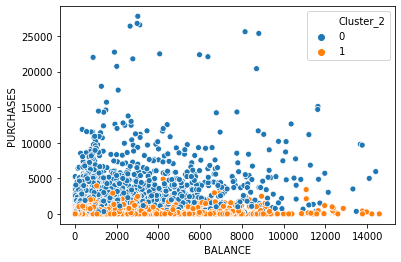

In [11]:
# 1. Escolha duas métricas e plote um gráfico de dispersão, separando por cor os pontos da
# clusterização k=2.

sns.scatterplot(x=df_cc['BALANCE'], y=df_cc['PURCHASES'], hue=df_cc['Cluster_2'])
plt.show()

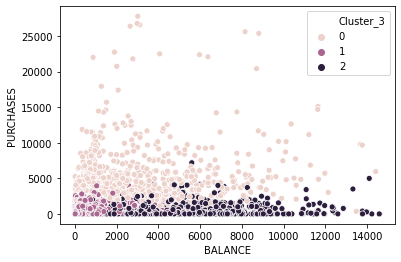


Visualmente, na minha opinião, a clusterização com k=3 ficou um pouco melhor,
possibilitando uma boa distinção entre os 3 clusters.


In [13]:
# 2. Repita o gráfico da questão anterior para k3. Visualmente qual a clusterização ficou melhor?
sns.scatterplot(x=df_cc['BALANCE'], y=df_cc['PURCHASES'], hue=df_cc['Cluster_3'])
plt.show()

print('\nVisualmente, na minha opinião, a clusterização com k=3 ficou um pouco melhor,\npossibilitando \
uma boa distinção entre os 3 clusters.')

In [14]:
# 3. Quantos casos ficaram enquadrados em cada cluster em cada uma das clusterizações?

print('Quantidade de casos enquadrados em cada cluster para k=2:')
print(df_cc['Cluster_2'].value_counts(sort=False))

print('\nQuantidade de casos enquadrados em cada cluster para k=3:')
print(df_cc['Cluster_3'].value_counts(sort=False))

Quantidade de casos enquadrados em cada cluster para k=2:
0    3691
1    5259
Name: Cluster_2, dtype: int64

Quantidade de casos enquadrados em cada cluster para k=3:
0    1283
1    6078
2    1589
Name: Cluster_3, dtype: int64


In [15]:
# 4. Qual a média e a mediana de valor de compras, de cada cluster em cada uma das clusterizações?

print('Média do valor de compras nos clusters para k=2:')
print(df_cc.groupby('Cluster_2')['PURCHASES'].mean())

print('\nMediana do valor de compras nos clusters para k=2:')
print(df_cc.groupby('Cluster_2')['PURCHASES'].median())

print('\nMédia do valor de compras nos clusters para k=3:')
print(df_cc.groupby('Cluster_3')['PURCHASES'].mean())

print('\nMediana do valor de compras nos clusters para k=3:')
print(df_cc.groupby('Cluster_3')['PURCHASES'].median())

Média do valor de compras nos clusters para k=2:
Cluster_2
0    1969.734657
1     268.528064
Name: PURCHASES, dtype: float64

Mediana do valor de compras nos clusters para k=2:
Cluster_2
0    1208.38
1      84.05
Name: PURCHASES, dtype: float64

Média do valor de compras nos clusters para k=3:
Cluster_3
0    3999.368106
1     489.556448
2     362.345085
Name: PURCHASES, dtype: float64

Mediana do valor de compras nos clusters para k=3:
Cluster_3
0    3056.73
1     300.00
2       0.00
Name: PURCHASES, dtype: float64


In [16]:
# 5. Usando a clusterização k=3, qual a mediana de limite de crédito de cada grupo?

print('Mediana de limite de crédito para cada grupo em k=3:')
print(df_cc.groupby('Cluster_3')['CREDIT_LIMIT'].median())

Mediana de limite de crédito para cada grupo em k=3:
Cluster_3
0    7000.0
1    2500.0
2    6000.0
Name: CREDIT_LIMIT, dtype: float64


# Exercício 2 – Diagnóstico de Câncer

### Pré-processamento dos dados

In [15]:
# 1. Importe os dados;

df_diagcancer = pd.read_csv('DIAG_CANCER.csv')

df_diagcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
# 2. Tratamento dos outliers:
# a. Temos outliers apenas na extremidade superior da variável “radius_mean”. Trate esses
#    valores extremos substituindo-os pela mediana da respectiva variável.

print(df_diagcancer['radius_mean'].sort_values(ascending=False).head(10))

df_diagcancer['radius_mean'] = np.where(df_diagcancer['radius_mean'] > 28.11,
                               df_diagcancer['radius_mean'].median(), df_diagcancer['radius_mean'])

print(df_diagcancer['radius_mean'].sort_values(ascending=False).head(10))

316    100003.00
315    100002.00
314    100001.00
313    100000.00
212        28.11
461        27.42
180        27.22
352        25.73
82         25.22
521        24.63
Name: radius_mean, dtype: float64
212    28.11
461    27.42
180    27.22
352    25.73
82     25.22
521    24.63
122    24.25
339    23.51
202    23.29
164    23.27
Name: radius_mean, dtype: float64


In [17]:
# 3. Valores ausentes:
# a. A última variável do dataset (Unnamed: 32) só possui valores ausentes. Exclua essa
#    variável.

df_diagcancer.drop(columns='Unnamed: 32', inplace=True)

In [18]:
# 4. Normalização:
# a. Com exceção dos campos id e diagnosis o dataset só possui variáveis numéricas. Aplique
#    a normalização Standard Scaler sobre essas variáveis numéricas.

norm_diag = StandardScaler()

norm_diag.fit(df_diagcancer.drop(columns=['id', 'diagnosis']))

valores_diagcancer_norm = norm_diag.transform(df_diagcancer.drop(columns=['id', 'diagnosis']))

df_diagcancer_norm = pd.DataFrame(valores_diagcancer_norm,
                                  columns=df_diagcancer.drop(columns=['id', 'diagnosis']).columns)

df_diagcancer_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.095878,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.830823,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.580144,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.775668,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.751062,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [19]:
# 5. Escolhendo a quantidade de componentes: a partir do da regra de Kaiser, escolha a quantidade
# de componentes.

pca = PCA()

pca.fit(df_diagcancer_norm)

print('Eigenvalues: ')
print(pca.explained_variance_)

print('\nPela regra de Kaiser, o número de componentes será 6')

Eigenvalues: 
[1.33010254e+01 5.69963234e+00 2.82278984e+00 1.98439806e+00
 1.65090694e+00 1.20965222e+00 6.76387974e-01 4.77442325e-01
 4.20926268e-01 3.51233151e-01 2.94671173e-01 2.61681489e-01
 2.41865381e-01 1.57143127e-01 9.44232448e-02 8.06574797e-02
 5.91114204e-02 5.25705347e-02 4.93699047e-02 3.11406375e-02
 3.00960523e-02 2.77857773e-02 2.45878805e-02 1.79477295e-02
 1.55175937e-02 8.38642732e-03 7.00014732e-03 2.48247860e-03
 1.32259922e-03 6.61311828e-04]

Pela regra de Kaiser, o número de componentes será 6


In [20]:
# 6. Redução de Dimensionalidade:
# a. Aplique PCA sobre os dados normalizados para obter os componentes definidos no passo
#    anterior.

pca = PCA(n_components = 6)

pca.fit(df_diagcancer_norm)

X_pca = pca.transform(df_diagcancer_norm)

In [21]:
# b. Crie um novo df com as variáveis resultantes do PCA e adicione nele a variável de
#    desfecho (diagnosis).

df_diagcancer_pca = pd.DataFrame(data = X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3',
                                                         'PCA_4', 'PCA_5', 'PCA_6'])

df_diagcancer_pca['diagnosis'] = df_diagcancer['diagnosis']

df_diagcancer_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,diagnosis
0,9.194007,1.944032,-1.124393,3.634522,-1.185467,1.406603,M
1,2.386247,-3.768845,-0.530505,1.118135,0.623374,0.029464,M
2,5.733461,-1.077277,-0.552992,0.912355,-0.174765,0.541035,M
3,7.125819,10.273728,-3.227468,0.159150,-2.965225,3.054897,M
4,3.934759,-1.950715,1.390038,2.939682,0.548906,-1.226018,M
...,...,...,...,...,...,...,...
564,6.438635,-3.580914,2.455774,1.174609,-0.069718,-2.377484,M
565,3.792339,-3.586639,2.084853,-2.506795,-0.512393,-0.246147,M
566,1.254475,-1.900895,0.561003,-2.091857,1.809062,-0.534079,M
567,10.375368,1.669077,-1.878506,-2.354858,-0.034458,0.568885,M


### Modelagem

In [40]:
# 1. Crie um modelo de classificação (árvore aleatória, regressão logística, a sua escolha...), aplique
# sobre os dados originais (dataframe completo, com as 30 variáveis explicativas). Tome nota da
# acurácia do modelo e os resultados de matriz de confusão.

# Será utilizado o modelo de Regressão Logística

x_treino, x_teste, y_treino, y_teste = train_test_split(df_diagcancer.drop(columns=['id', 'diagnosis']),
                                        df_diagcancer['diagnosis'], train_size=0.3)

modelo_1 = LogisticRegression(max_iter=10000)
modelo_1.fit(x_treino, y_treino)
preds = modelo_1.predict(x_teste)

acc = accuracy_score(y_teste, preds)
print('Acurácia: {:.2f}%'.format(acc*100))
conf_mat = confusion_matrix(y_teste, preds)
print(conf_mat)

Acurácia: 96.24%
[[237   3]
 [ 12 147]]


In [35]:
# 2. Repita o processo (modelagem), só que dessa vez treine e teste o modelo usando o df PCA que
# você criou anteriormente (5 variáveis explicativas + variável de desfecho). Tome nota da
# acurácia do modelo e os resultados de matriz de confusão.

# NA REALIDADE ENCONTREI 6 VARIÁVEIS PCA PELA REGRA DE KAISER. ACREDITO SER POR CAUSA DE
# ALGUMA DIFERENÇA NO TRATAMENTO DOS DADOS NO INÍCIO.

x_treino, x_teste, y_treino, y_teste = train_test_split(df_diagcancer_pca.drop(columns=['diagnosis']),
                                        df_diagcancer_pca['diagnosis'], train_size=0.3)

modelo_2 = LogisticRegression(max_iter=10000)
modelo_2.fit(x_treino, y_treino)
preds = modelo_2.predict(x_teste)

acc = accuracy_score(y_teste, preds)
print('Acurácia: {:.2f}%'.format(acc*100))
conf_mat = confusion_matrix(y_teste, preds)
print(conf_mat)


Acurácia: 95.24%
[[238  15]
 [  4 142]]


In [33]:
# 3. Nesse exercício reduzimos a complexidade computacional na ordem de 6x (de 30 variáveis
# explicativas para apenas 5). Na sua avaliação observando os resultados de treino/teste, de
# ambos os modelos, perdemos acurácia? Se sim, quanto?

# Reiterando, encontrei 6 variáveis PCA pela regra de kaiser ao invés de 5, que acredito ser
# por causa de alguma diferença no tratamento dos dados.
# Os resultados acima mostram que se obteve um pequena perda de acurácia com as variáveis PCA,
# da ordem de 1%. Entretanto, ao rodar o modelo outras vezes sem definir um valor fixo
# no campo random_state do train_test_split, houveram oportunidades em que a diferença
# foi menor ou até mesmo a favor das variáveis PCA.